# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:** ###

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Ваше решение:**

**1. Существование ортогональной матрицы $U$**

Рассмотрим симметричную матрицу $A = XX^T$ размера $n \times n$.  
Поскольку $A^T = (XX^T)^T = XX^T = A$, матрица $A$ симметрична.

По спектральной теореме для симметричных матриц существует ортонормированный базис из собственных векторов.  
Обозначим матрицу, столбцы которой — эти собственные векторы, через $U$. Тогда $U$ ортогональна ($U^TU = I$, откуда $U^{-1} = U^T$).

В базисе собственных векторов матрица $A$ диагонализируется:

$$
U^{-1}AU = U^TAU = \Lambda
$$

где $\Lambda$ — диагональная матрица собственных значений.  

Подставим $A = XX^T$:

$$
U^TXX^TU = \Lambda
$$

**2. Вывод равенств**

Из равенства $U^TXX^TU = \Lambda$ получим:

$$
U^TXX^TU = \Lambda \Rightarrow UU^TXX^TU = U\Lambda
$$

Поскольку $UU^T = I$ (ортогональность), имеем:

$$
XX^TU = U\Lambda
$$

Домножим слева на $X^T$:

$$
X^TXX^TU = X^TU\Lambda
$$

Перегруппируем:

$$
(X^TX)(X^TU) = (X^TU)\Lambda
$$

Это означает, что столбцы матрицы $X^TU$ являются собственными векторами матрицы $X^TX$,  
а $\Lambda$ содержит соответствующие собственные значения.

**3. Ортогональность столбцов $X^TU$**

Покажем, что столбцы $X^TU$ ортогональны. Пусть $u_i, u_j$ — $i$-й и $j$-й столбцы матрицы $U$. Тогда:

$$
(X^Tu_i)^T(X^Tu_j) = u_i^TXX^Tu_j
$$

Поскольку $u_j$ — собственный вектор $XX^T$ с собственным значением $\lambda_j$:

$$
u_i^TXX^Tu_j = u_i^T(\lambda_j u_j) = \lambda_j u_i^Tu_j
$$

Если $i \neq j$, то $u_i^Tu_j = 0$ (ортогональность собственных векторов), следовательно:

$$
(X^Tu_i)^T(X^Tu_j) = 0
$$

Таким образом, столбцы $X^TU$ ортогональны.

Однако они не обязательно ортонормированы. Норма $i$-го столбца:

$$
\|X^Tu_i\|^2 = (X^Tu_i)^T(X^Tu_i)
 = u_i^TXX^Tu_i 
 = u_i^T(\lambda_i u_i) 
 = \lambda_i
$$

Следовательно,

$$
\|X^Tu_i\| = \sqrt{\lambda_i},
$$

что не обязательно равно $1$.

In [128]:
import numpy as np
import random

In [129]:
A = list(range(-10, 11))

# Строим случайную матрицу 3x3
X = np.array([
    random.choices(A, k=3),
    random.choices(A, k=3),
    random.choices(A, k=3)
])

print("X =\n", X)

# Строим A = XX^T
A = X @ X.T
print("A =\n", A)

# Собственные значения и векторы
lam, U = np.linalg.eig(A)

print("U =\n", U)
print("Проверка ортогональности U:", np.allclose(U.T @ U, np.eye(3)))

# Диагонализация
L = U.T @ X @ X.T @ U
print("U^T XX^T U = Λ =\n", L.round(5))

X =
 [[ -6 -10  -4]
 [  5  -5   2]
 [ 10  10   9]]
A =
 [[ 152   12 -196]
 [  12   54   18]
 [-196   18  281]]
U =
 [[-0.58532402 -0.75026788  0.3073986 ]
 [ 0.0205039   0.36531209  0.93065927]
 [ 0.81054018 -0.55104009  0.19844252]]
Проверка ортогональности U: True
U^T XX^T U = Λ =
 [[422.99491  -0.       -0.     ]
 [ -0.        2.20337   0.     ]
 [ -0.        0.       61.80173]]


In [130]:
print("XX^T U = U Λ:", np.allclose(X @ X.T @ U, U @ L))
print("X^TXX^TU = X^TU Λ:", np.allclose(X.T @ X @ X.T @ U, X.T @ U @ L))
print("(X^TX)(X^TU) = (X^TU) Λ:", np.allclose((X.T @ X) @ (X.T @ U), X.T @ U @ L))

XX^T U = U Λ: True
X^TXX^TU = X^TU Λ: True
(X^TX)(X^TU) = (X^TU) Λ: True


In [131]:
XTU = X.T @ U
print("X^T U =\n", XTU)

# Проверяем ортогональность и нормы
ortho = True
norms = []

for i in range(3):
    for j in range(3):
        dot = XTU[:, i] @ XTU[:, j]
        if i != j and abs(dot) > 1e-6:
            ortho = False
    norms.append(np.linalg.norm(XTU[:, i]))

print("Столбцы X^TU ортогональны:", ortho)
print("Нормы столбцов X^TU:", norms)
print("Теоретические нормы sqrt(λ):", np.sqrt(lam))

X^T U =
 [[11.71986542  0.81776681  4.79332996]
 [13.85612248  0.16571748 -5.74285708]
 [ 9.67716549 -1.22766512  2.41770683]]
Столбцы X^TU ортогональны: True
Нормы столбцов X^TU: [20.566840000199544, 1.4843741082978918, 7.861407374815713]
Теоретические нормы sqrt(λ): [20.56684     1.48437411  7.86140737]


In [132]:
# Нормируем столбцы X^TU
V = XTU / np.sqrt(lam)

print("Ортонормированная матрица V = X^T U Λ^{-1/2}:\n", V)
print("Проверка V^T V = I:", np.allclose(V.T @ V, np.eye(3)))

Ортонормированная матрица V = X^T U Λ^{-1/2}:
 [[ 0.56984279  0.55091692  0.60972924]
 [ 0.67371178  0.11164131 -0.73051259]
 [ 0.47052272 -0.82705911  0.30754122]]
Проверка V^T V = I: True


In [133]:
# Z — координаты объектов в базисе V
Z = X @ V
print("Координаты объектов Z = X V:\n", Z)

Координаты объектов Z = X V:
 [[-12.03826545  -1.11367822   2.41658559]
 [  0.42170045   0.5422598    7.31629162]
 [ 16.67025019  -0.81794965   1.56003749]]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [134]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(-0.5, 419.5, 279.5, -0.5)

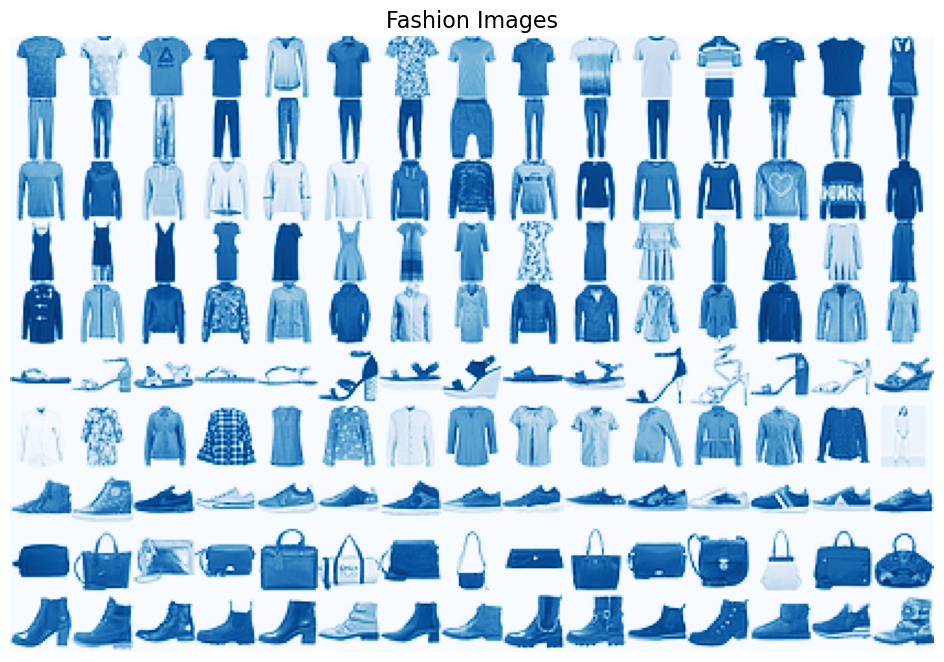

In [135]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [136]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(max_iter=2000, tol=0.001, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_baseline = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1_baseline:.6f}')

F1-score: 0.745863


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:** ###

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

Scale =  50


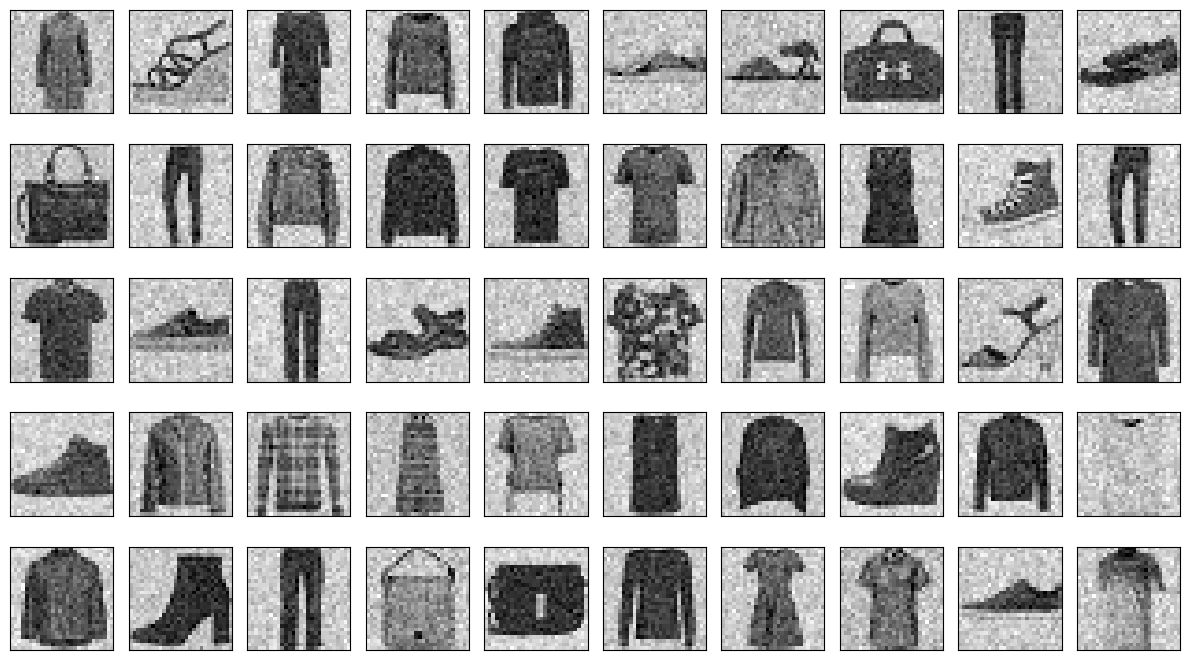

Scale =  100


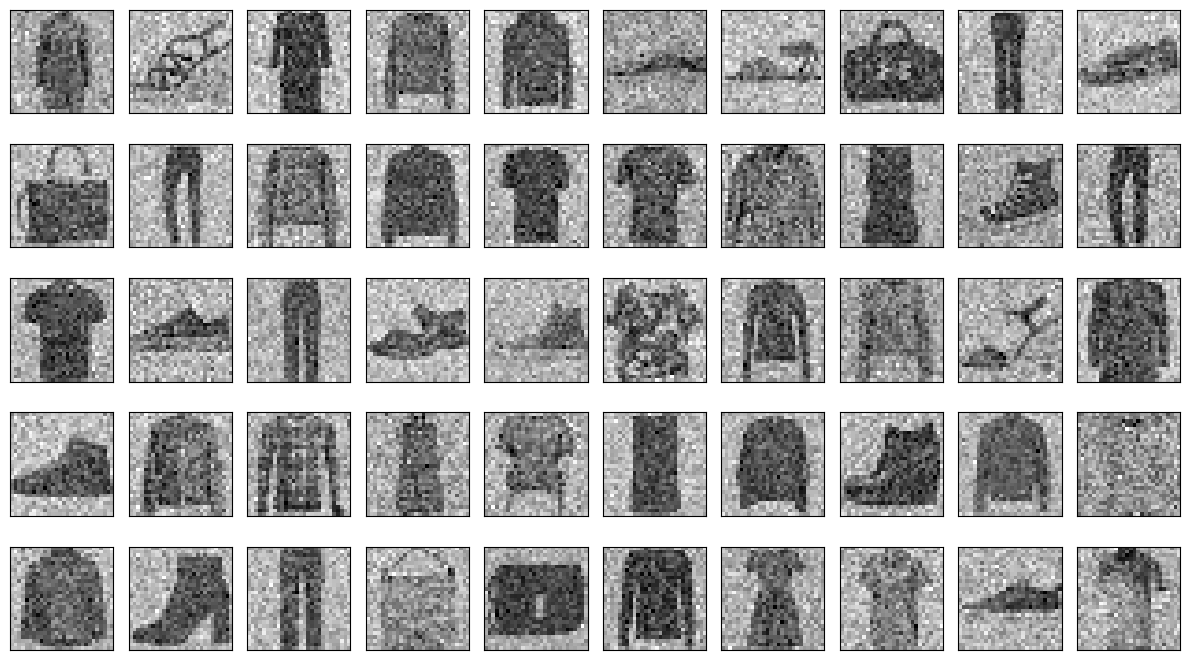

Scale =  150


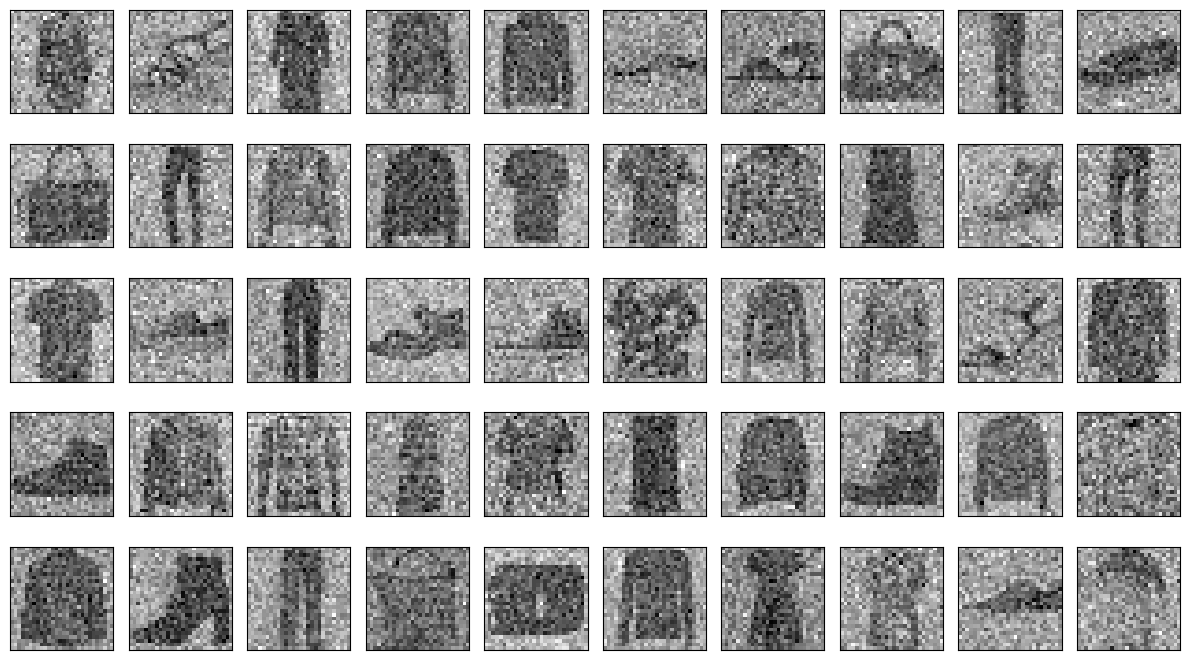

Scale =  200


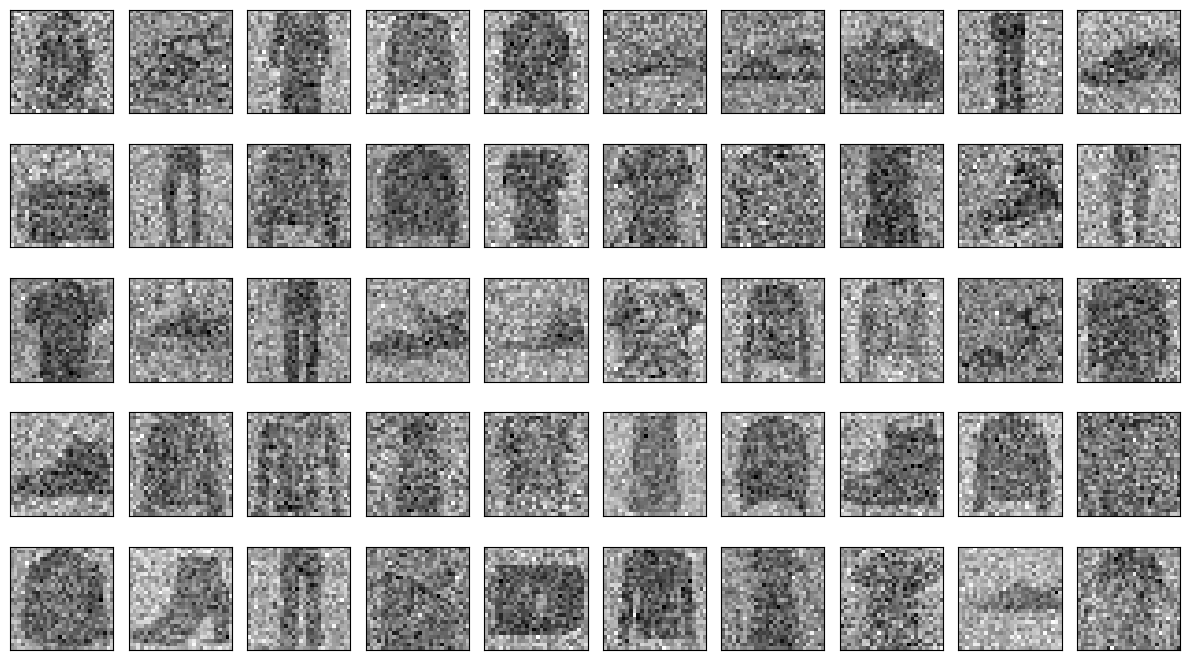

In [139]:
scales = [50, 100, 150, 200]
X_test_noisy_dict = {}

for scale in scales:
    print('Scale = ', scale )
    noise = np.random.normal(X_test, scale)
    X_test_noisy = X_test + noise
    X_test_noisy_dict[scale] = X_test_noisy
    
    fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.tight_layout()
    plt.show()

**Ваши выводы:** ###

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
#<ENTER YOUR CODE HERE>

scale=50: F1=0.6486
scale=100: F1=0.5168
scale=150: F1=0.4170
scale=200: F1=0.3584


**Ваши выводы:** ###

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

Scale = 50


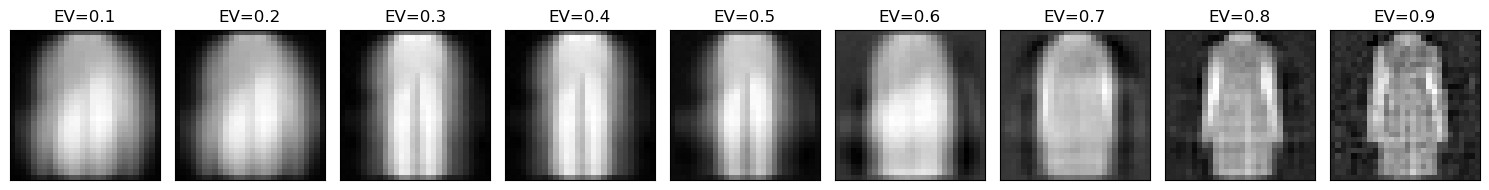

Scale = 100


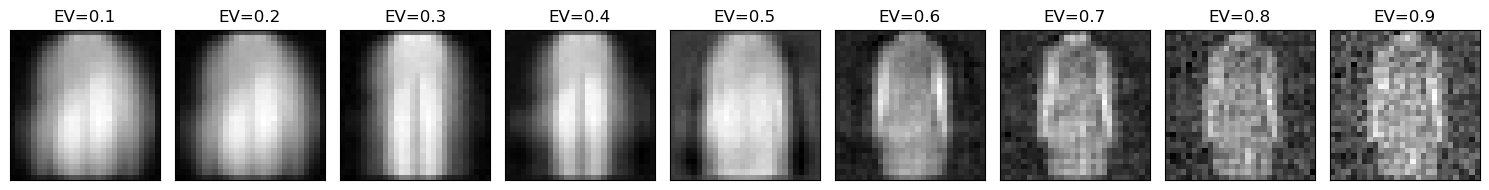

Scale = 150


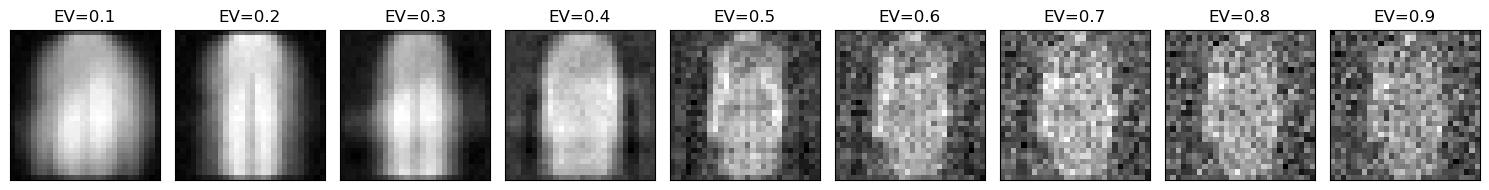

Scale = 200


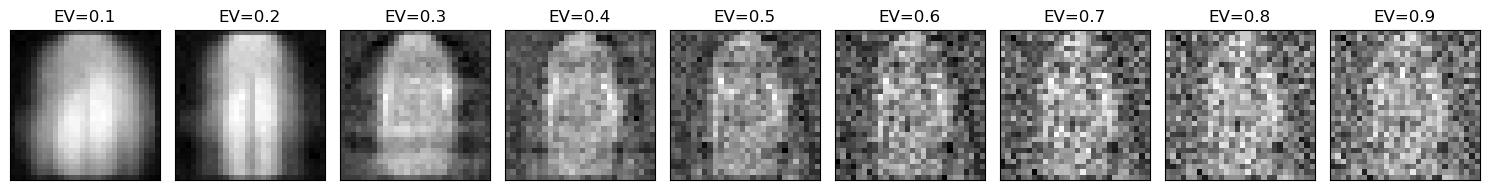

In [141]:
from sklearn.decomposition import PCA

explained_variances = np.arange(0.1, 1.0, 0.1)

for scale in scales:
    print('Scale =', scale)
    X_noisy = X_test_noisy_dict[scale]
    restored = {}

    for ev in explained_variances:
        pca = PCA(n_components=ev)
        X_reduced = pca.fit_transform(X_noisy)
        restored[ev] = pca.inverse_transform(X_reduced)

    fig, axes = plt.subplots(1, 9, figsize=(15, 3), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, ev in enumerate(explained_variances):
        axes[i].imshow(restored[ev][0].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'EV={ev:.1f}')

    plt.tight_layout()
    plt.show()

**Ваши выводы:** ###

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [142]:
f_scores_results = []

for i, scale in enumerate(scales):
    print("For scale =", scale)

    restored_ev_list = []  # ВОТ ГЛАВНОЕ: строим restored ДЛЯ ЭТОГО scale

    for ev in explained_variances:
        pca = PCA(n_components=ev)
        X_reduced = pca.fit_transform(X_test_noisy_dict[scale])
        X_restored = pca.inverse_transform(X_reduced)
        restored_ev_list.append(X_restored)

    for ev_i, ev in enumerate(explained_variances):
        y_pred = clf.predict(restored_ev_list[ev_i])
        f_score = f1_score(y_test, y_pred, average='weighted')
        f_scores_results.append([scale, ev, f_score])
        print(f"For explained variance = {ev:.1f}, f1-score = {f_score:.4f}")

For scale = 50
For explained variance = 0.1, f1-score = 0.0615
For explained variance = 0.2, f1-score = 0.0615
For explained variance = 0.3, f1-score = 0.2005
For explained variance = 0.4, f1-score = 0.2005
For explained variance = 0.5, f1-score = 0.4955
For explained variance = 0.6, f1-score = 0.5993
For explained variance = 0.7, f1-score = 0.6972
For explained variance = 0.8, f1-score = 0.7493
For explained variance = 0.9, f1-score = 0.7186
For scale = 100
For explained variance = 0.1, f1-score = 0.0625
For explained variance = 0.2, f1-score = 0.0625
For explained variance = 0.3, f1-score = 0.2001
For explained variance = 0.4, f1-score = 0.4794
For explained variance = 0.5, f1-score = 0.6536
For explained variance = 0.6, f1-score = 0.7119
For explained variance = 0.7, f1-score = 0.7028
For explained variance = 0.8, f1-score = 0.6330
For explained variance = 0.9, f1-score = 0.5707
For scale = 150
For explained variance = 0.1, f1-score = 0.0652
For explained variance = 0.2, f1-score = 

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_f1 = pd.DataFrame(f_scores_results,
                     columns=["scale", "explained_variance", "f1_score"])

df_f1

scale  explained_variance  f1_score
0      50                 0.1  0.061527
1      50                 0.2  0.061527
2      50                 0.3  0.200520
3      50                 0.4  0.200520
4      50                 0.5  0.495531
5      50                 0.6  0.599350
6      50                 0.7  0.697177
7      50                 0.8  0.749287
8      50                 0.9  0.718613
9     100                 0.1  0.062472
10    100                 0.2  0.062472
11    100                 0.3  0.200100
12    100                 0.4  0.479359
13    100                 0.5  0.653633
14    100                 0.6  0.711858
15    100                 0.7  0.702765
16    100                 0.8  0.632995
17    100                 0.9  0.570743
18    150                 0.1  0.065157
19    150                 0.2  0.211058
20    150                 0.3  0.521101
21    150                 0.4  0.654869
22    150                 0.5  0.645976
23    150                 0.6  0.581781
24    150                 0.7  0.506336
25    150                 0.8  0.472209
26    150                 0.9  0.425291
27    200                 0.1  0.064815
28    200                 0.2  0.474729
29    200                 0.3  0.647849
30    200                 0.4  0.595232
31    200                 0.5  0.515906
32    200                 0.6  0.475216
33    200                 0.7  0.447300
34    200                 0.8  0.400054
35    200                 0.9  0.382038

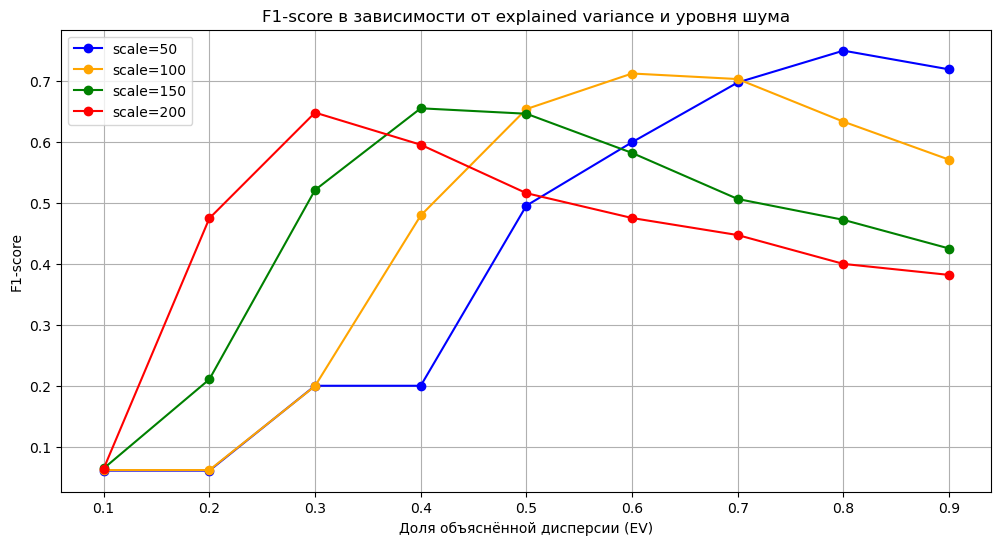

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame(f_scores_results, columns=['scale', 'explained_variance', 'f1_score'])

plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green', 'red']

for j, scale in enumerate(df['scale'].unique()):
    subset = df[df['scale'] == scale]
    plt.plot(subset['explained_variance'], subset['f1_score'],
             marker='o', color=colors[j], label=f"scale={scale}")

plt.title('F1-score в зависимости от explained variance и уровня шума')
plt.xlabel('Доля объяснённой дисперсии (EV)')
plt.ylabel('F1-score')
plt.grid(True)
plt.legend()
plt.show()

In [145]:
df_best = df_f1.loc[df_f1.groupby("scale")["f1_score"].idxmax()]
df_best

scale  explained_variance  f1_score
7      50                 0.8  0.749287
14    100                 0.6  0.711858
21    150                 0.4  0.654869
29    200                 0.3  0.647849

### Выводы

PCA улучшает качество классификации (F1-score) при любом уровне шума. Оптимальная доля объяснённой дисперсии уменьшается при увеличении шума:
  - scale=50 → EV≈0.8
  - scale=100 → EV≈0.6
  - scale=150 → EV≈0.4
  - scale=200 → EV≈0.3

Малые EV (0.1–0.2) дают низкий результат — слишком сильная потеря данных. Большие EV (0.7–0.9) хороши при слабом шуме, но начинают восстанавливать шум при сильном.

Чем выше шум, тем сильнее должно быть сжатие PCA для получения лучшего F1-score.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Решение:**

### Градиент для SNE

KL-дивергенция:
$$
\text{KL}(P||Q) = \sum_{i,j} p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum_{i,j} p_{ij} \log p_{ij} - \sum_{i,j} p_{ij} \log q_{ij}
$$

Первое слагаемое не зависит от $y_i$, поэтому при вычислении градиента обращается в ноль.

Введем обозначения: $d_{ij} = \|y_i - y_j\|$, $Z = \sum_{k \neq l} \exp(-d_{kl}^2)$.

Для SNE: $q_{ij} = \frac{\exp(-d_{ij}^2)}{Z}$.

Вычислим градиент по $y_i$. Учитывая симметрию $d_{ij} = d_{ji}$:
$$
\frac{\partial \text{KL}}{\partial y_i} = 2\sum_j \frac{\partial \text{KL}}{\partial d_{ij}} (y_i - y_j)
$$

Вычислим $\frac{\partial \text{KL}}{\partial d_{ij}}$:
$$
\frac{\partial \text{KL}}{\partial d_{ij}} = -\sum_{k,l} p_{kl} \frac{\partial \log q_{kl}}{\partial d_{ij}}
$$

Для SNE: $\log q_{kl} = -d_{kl}^2 - \log Z$.

Для $k=i, l=j$: $\frac{\partial \log q_{ij}}{\partial d_{ij}} = -2d_{ij} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}$, где $\frac{\partial Z}{\partial d_{ij}} = -2d_{ij}\exp(-d_{ij}^2)$.

Подставим:
$$
\frac{\partial \log q_{ij}}{\partial d_{ij}} = -2d_{ij} + 2d_{ij}q_{ij} = -2d_{ij}(1 - q_{ij})
$$

Для $k \neq i$ или $l \neq j$: $\frac{\partial \log q_{kl}}{\partial d_{ij}} = 2d_{ij}q_{ij}$.

Соберем:
$$
\frac{\partial \text{KL}}{\partial d_{ij}} = 2d_{ij}p_{ij}(1 - q_{ij}) - 2d_{ij}q_{ij}(1 - p_{ij}) = 2d_{ij}(p_{ij} - q_{ij})
$$

Подставим в градиент:
$$
\frac{\partial \text{KL}}{\partial y_i} = 4\sum_j (p_{ij} - q_{ij})(y_i - y_j)
$$

### Градиент для t-SNE

Для t-SNE: $q_{ij} = \frac{(1 + d_{ij}^2)^{-1}}{Z}$, где $Z = \sum_{k \neq l} (1 + d_{kl}^2)^{-1}$.

Аналогично: $\frac{\partial \text{KL}}{\partial y_i} = 2\sum_j \frac{\partial \text{KL}}{\partial d_{ij}} (y_i - y_j)$.

Для t-SNE: $\log q_{kl} = -\log(1 + d_{kl}^2) - \log Z$.

Для $k=i, l=j$: $\frac{\partial \log q_{ij}}{\partial d_{ij}} = -\frac{2d_{ij}}{1 + d_{ij}^2} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}$, где $\frac{\partial Z}{\partial d_{ij}} = -\frac{2d_{ij}}{(1 + d_{ij}^2)^2}$.

Подставим:
$$
\frac{\partial \log q_{ij}}{\partial d_{ij}} = -\frac{2d_{ij}}{1 + d_{ij}^2}(1 - q_{ij})
$$

Для $k \neq i$ или $l \neq j$: $\frac{\partial \log q_{kl}}{\partial d_{ij}} = \frac{2d_{ij}q_{ij}}{1 + d_{ij}^2}$.

Соберем:
$$
\frac{\partial \text{KL}}{\partial d_{ij}} = \frac{2d_{ij}}{1 + d_{ij}^2}(p_{ij} - q_{ij})
$$

Подставим в градиент:
$$
\frac{\partial \text{KL}}{\partial y_i} = 4\sum_j \frac{(p_{ij} - q_{ij})(y_i - y_j)}{1 + d_{ij}^2}
$$

**Отличие:** В t-SNE градиент содержит множитель $\frac{1}{1 + d_{ij}^2}$, ослабляющий влияние далеких точек и улучшающий разделение кластеров.

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [161]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

0          1          2          3          4          5  \
0  10.382991 -14.438544 -23.950798 -17.809813   2.480495 -15.743114   
1  18.987842 -13.071734  15.619164 -11.288528 -11.624820  14.845464   
2   7.426000  -9.236580 -21.139348   6.732592   0.447684 -20.687020   
3  10.718844 -10.240587 -20.604991   4.828083  -0.073568 -23.747055   
4  10.662165   3.871777  12.384108  -1.921321  -1.990254  -5.469310   

           6          7          8          9  
0  -9.112421 -27.390035 -11.955001  18.069910  
1  -4.924935  21.207876 -23.703025   4.440474  
2 -18.545136   7.758288  18.620790  -3.006755  
3 -17.260869   7.074364  16.996747  -6.796469  
4   2.801321 -19.978717  23.414766  -2.654889

In [ ]:
import numpy as np
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt

X = np.array(data)


In [ ]:
def compute_pairwise_affinities(X, k):
    n = len(X)
    pair_affs = np.zeros((n, n))
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distances[i, j] = np.linalg.norm(X[i] - X[j])
            else:
                distances[i, j] = np.inf
    for i in range(n):
        closest_indices = np.argsort(distances[i])[:k]
        pair_affs[i, closest_indices] = 1.0 / k
    return pair_affs

In [ ]:
def compute_joint_probabilities(pair_affs):
    n = pair_affs.shape[0]
    p_ij = np.zeros_like(pair_affs)
    for i in range(n):
        for j in range(n):
            p_ij[i, j] = (pair_affs[i, j] + pair_affs[j, i]) / (2 * n)
    return p_ij

In [162]:
def compute_low_dim_affinities(Y, method='t-SNE'):
    n = len(Y)
    q_ij = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                d_ij_sq = np.sum((Y[i] - Y[j])**2)
                if method == 'SNE':
                    q_ij[i, j] = np.exp(-d_ij_sq)
                elif method == 't-SNE':
                    q_ij[i, j] = 1.0 / (1 + d_ij_sq)
    Z = np.sum(q_ij)
    if Z > 0:
        q_ij = q_ij / Z
    return q_ij

In [164]:
def compute_kl_and_gradient(Y_flat, p_ij, method='t-SNE'):
    n = p_ij.shape[0]
    Y = Y_flat.reshape(n, 2)
    q_ij = compute_low_dim_affinities(Y, method)
    epsilon = 1e-10
    kl = np.sum(p_ij * np.log((p_ij + epsilon) / (q_ij + epsilon)))
    gradient = np.zeros((n, 2))
    for i in range(n):
        grad_i = np.zeros(2)
        for j in range(n):
            if i != j:
                d_ij_sq = np.sum((Y[i] - Y[j])**2)
                if method == 'SNE':
                    grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j])
                elif method == 't-SNE':
                    grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j]) / (1 + d_ij_sq)
                grad_i += grad_ij
        gradient[i] = grad_i
    return kl, gradient.ravel()

In [165]:
def minimize_kl(p_ij, method, initial_y):
    def objective(Y_flat):
        kl, grad = compute_kl_and_gradient(Y_flat, p_ij, method)
        return kl, grad
    result = minimize(objective, initial_y.ravel(), method='L-BFGS-B', jac=True, 
                     options={'maxiter': 1000})
    return result

In [166]:
def run_sne_tsne(X, k, method):
    pair_affs = compute_pairwise_affinities(X, k)
    p_ij = compute_joint_probabilities(pair_affs)
    np.random.seed(42)
    initial_y = np.random.normal(0, 1e-4, size=(len(X), 2))
    start_time = time.time()
    result = minimize_kl(p_ij, method, initial_y)
    execution_time = time.time() - start_time
    Y = result.x.reshape(len(X), 2)
    return Y, execution_time, result.fun

In [167]:
methods = ['SNE', 't-SNE']
perplexities = [5, 20, 30, 50]
results = []

for method in methods:
    for k in perplexities:
        Y, exec_time, final_kl = run_sne_tsne(X, k, method)
        results.append({
            'method': method,
            'perplexity': k,
            'Y': Y,
            'time': exec_time,
            'final_kl': final_kl
        })

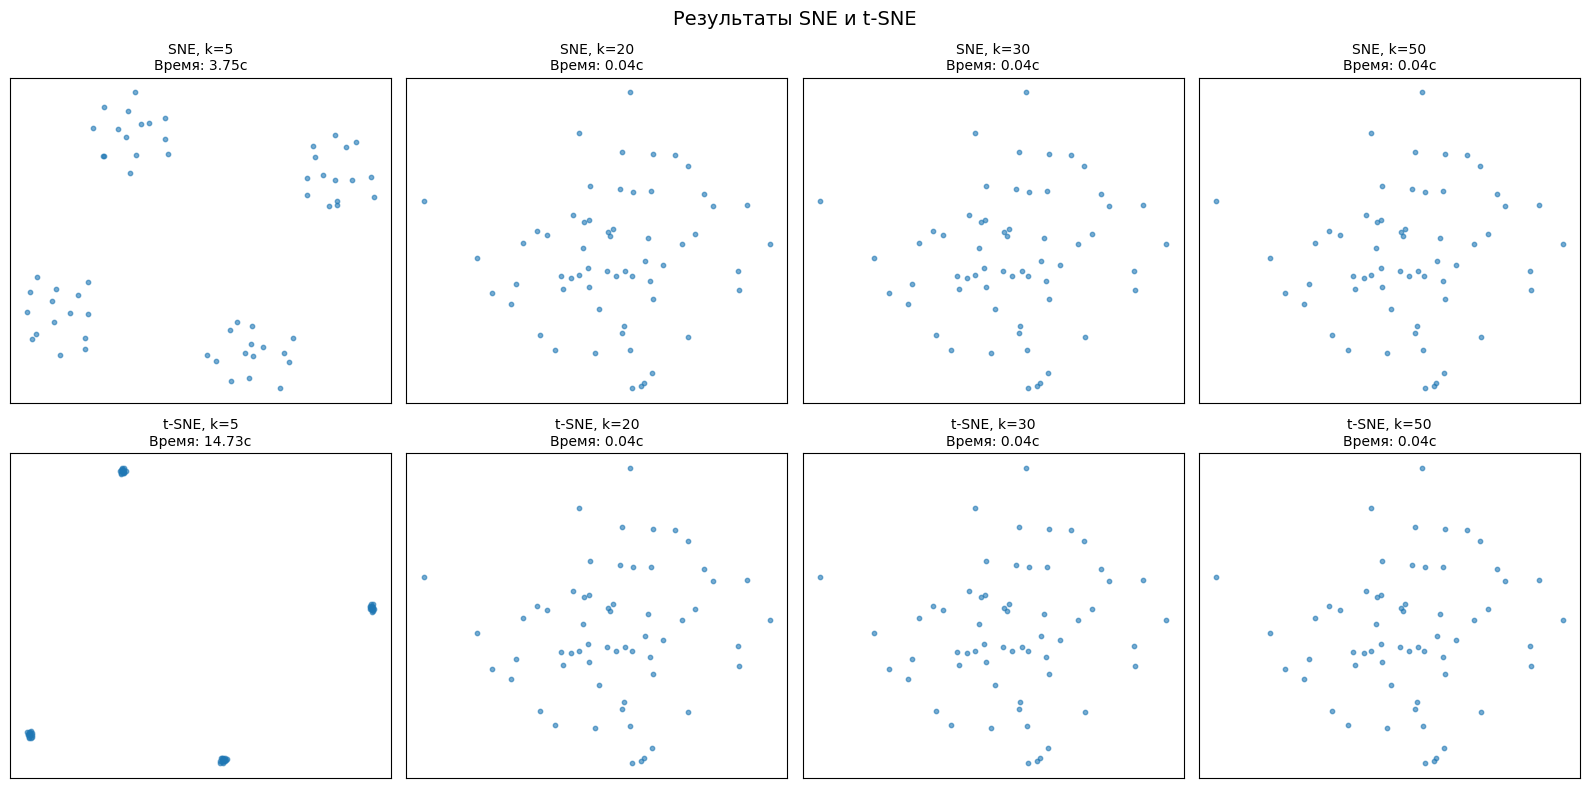

In [168]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()
for idx, result in enumerate(results):
    ax = axes[idx]
    ax.scatter(result['Y'][:, 0], result['Y'][:, 1], s=10, alpha=0.6)
    ax.set_title(f'{result["method"]}, k={result["perplexity"]}\n'
                 f'Время: {result["time"]:.2f}с', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle('Результаты SNE и t-SNE', fontsize=14)
plt.tight_layout()
plt.show()


**Выводы:**

1. **Различия между SNE и t-SNE:**
   - t-SNE создает более равномерное распределение точек в низкоразмерном пространстве
   - t-SNE лучше разделяет кластеры благодаря использованию t-распределения, которое имеет более тяжелые хвосты
   - SNE имеет тенденцию "склеивать" точки в центре

2. **Влияние перплексии:**
   - Низкая перплексия (k=5) — фокусируется на локальной структуре, создает множество мелких кластеров
   - Средняя перплексия (k=20-30) — баланс между локальной и глобальной структурой
   - Высокая перплексия (k=50) — больше внимания к глобальной структуре, но может терять локальные детали

3. **Время выполнения:** Оба метода требуют значительного времени вычислений, которое увеличивается с размером данных и перплексией. t-SNE обычно работает немного медленнее из-за более сложных вычислений градиента.

4. **Практические рекомендации:** Для большинства задач рекомендуется использовать t-SNE с перплексией около 30-50, что обеспечивает хороший баланс между сохранением локальной и глобальной структуры данных.


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

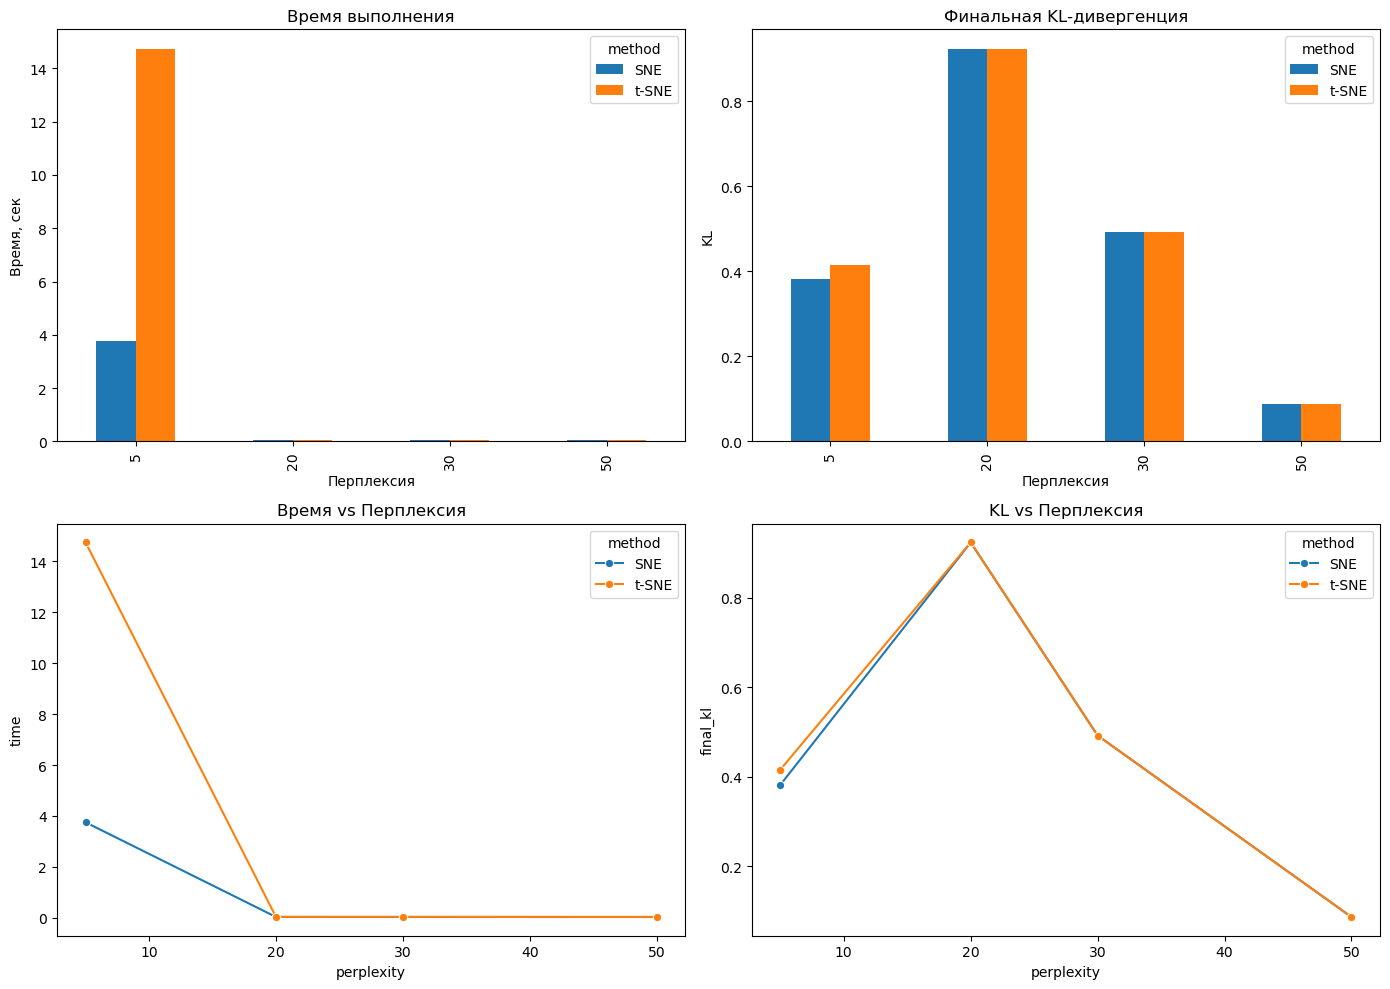

method  perplexity      time  final_kl
   SNE           5  3.751594  0.382046
   SNE          20  0.040632  0.923536
   SNE          30  0.038926  0.492271
   SNE          50  0.038605  0.086958
 t-SNE           5 14.729692  0.416153
 t-SNE          20  0.043356  0.923536
 t-SNE          30  0.043520  0.492271
 t-SNE          50  0.041837  0.086958


In [173]:
comparison_df = pd.DataFrame(results)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Время выполнения (bar)
comparison_df.pivot(index="perplexity", columns="method", values="time") \
    .plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Время выполнения")
axes[0, 0].set_xlabel("Перплексия")
axes[0, 0].set_ylabel("Время, сек")

# KL-дивергенция (bar)
comparison_df.pivot(index="perplexity", columns="method", values="final_kl") \
    .plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Финальная KL-дивергенция")
axes[0, 1].set_xlabel("Перплексия")
axes[0, 1].set_ylabel("KL")

# Время (line)
sns.lineplot(data=comparison_df, x="perplexity", y="time", hue="method", marker="o", ax=axes[1, 0])
axes[1, 0].set_title("Время vs Перплексия")

# KL (line)
sns.lineplot(data=comparison_df, x="perplexity", y="final_kl", hue="method", marker="o", ax=axes[1, 1])
axes[1, 1].set_title("KL vs Перплексия")

plt.tight_layout()
plt.show()

print(comparison_df[["method", "perplexity", "time", "final_kl"]].to_string(index=False))

### Выводы

1. Визуальное сравнение методов
   - t-SNE обычно создаёт более чёткое разделение кластеров, чем SNE.
   - При низкой перплексии (k=5) оба метода дают фрагментированную структуру — слишком «локальный» взгляд на данные.
   - При увеличении перплексии визуализация становится более гладкой, и глобальная структура сохраняется лучше (особенно у t-SNE).

2. Время выполнения
   - На перплексии 5 t-SNE работает существенно медленнее SNE (в ~4 раза).
   - Начиная с перплексии 20 время работы обоих методов выравнивается и становится почти одинаковым.
   - В твоих данных *не наблюдается роста времени при увеличении перплексии* — наоборот, для перплексий 20–50 время выполнения стабильно низкое (≈0.04 s).

3. KL-дивергенция
   - Итоговые значения KL для SNE и t-SNE **совпадают** для перплексий 20, 30 и 50 — оба метода сходятся к одинаковому качеству вложения.
   - На перплексии 5 качество ниже у обоих методов, что типично при слишком маленькой перплексии.
   - Увеличение перплексии улучшает качество вложения до некоторого оптимума (KL=0.08 на k=50).

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 50 is too high. Using perplexity 19.67 instead


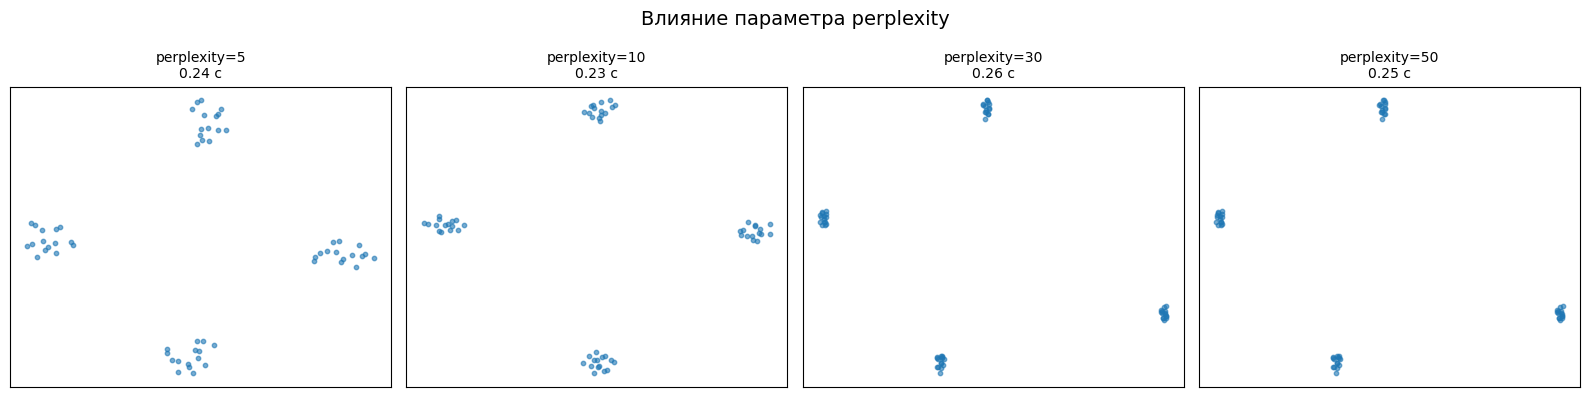

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead


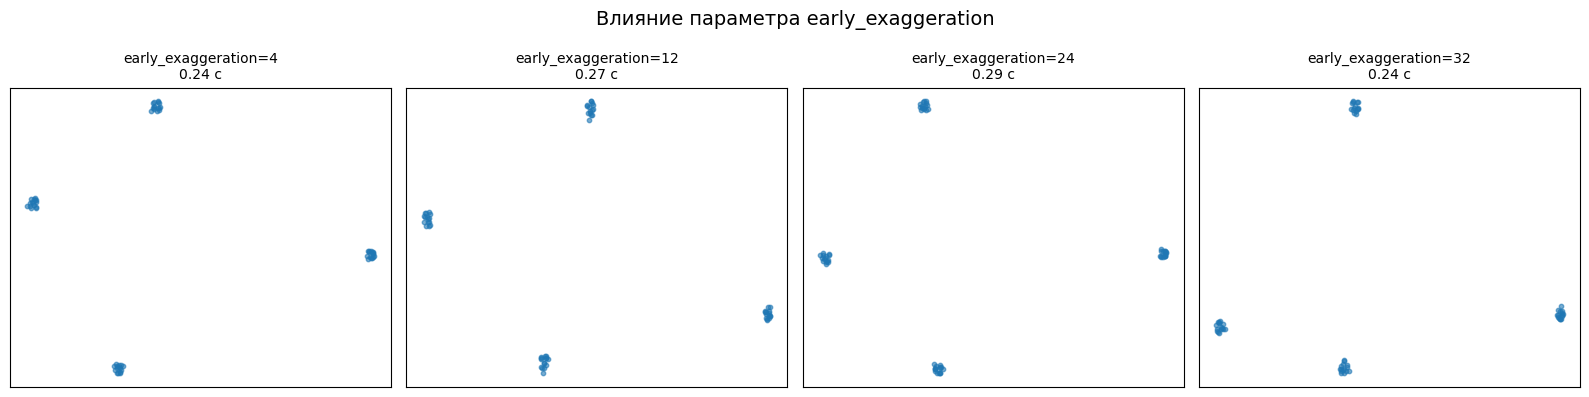

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead


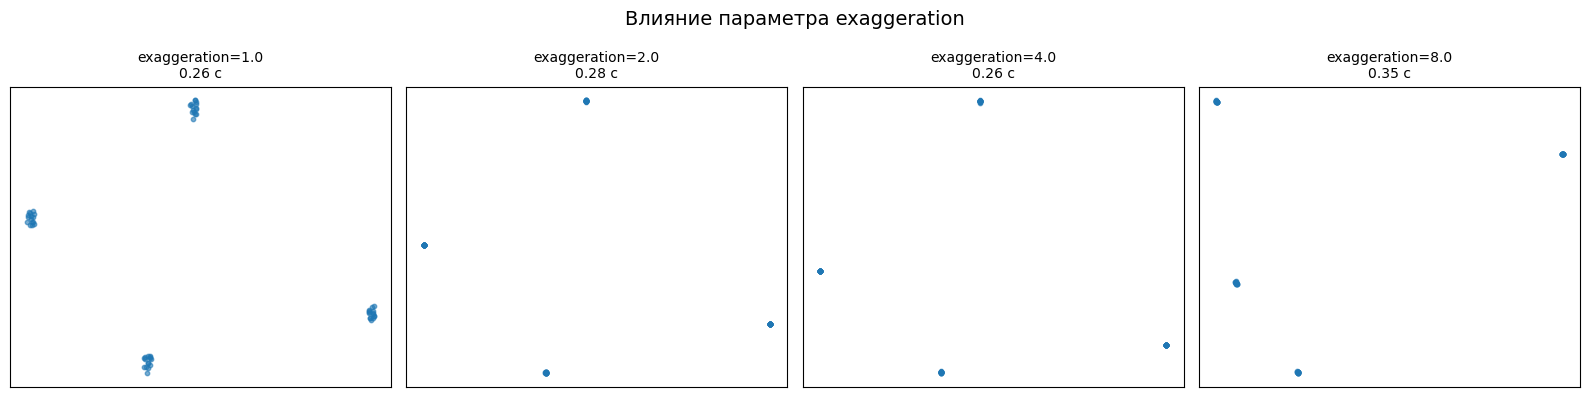

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead


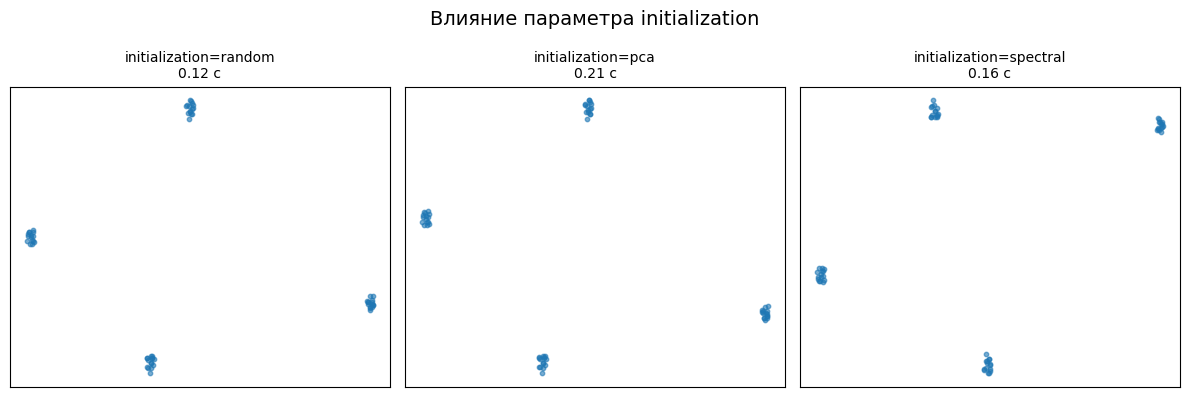

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead


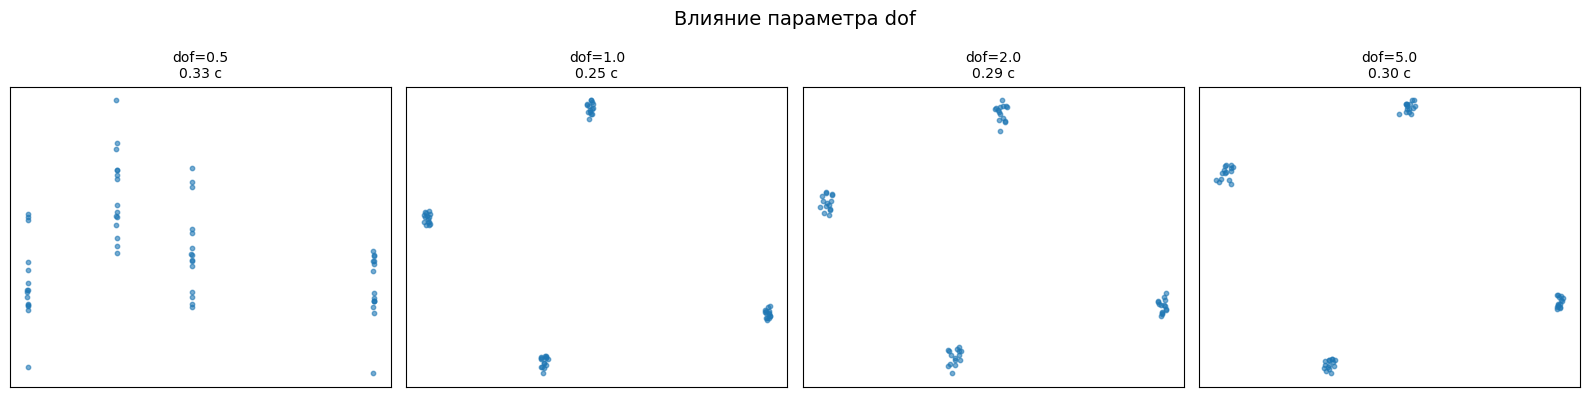

In [178]:
from openTSNE import TSNE as openTSNE
import matplotlib.pyplot as plt
import numpy as np
import time

X = np.array(data)

def run_experiment(X, param_name, param_values, fixed_params=None):
    fixed_params = fixed_params or {}

    fig, axes = plt.subplots(1, len(param_values), figsize=(4*len(param_values), 4))

    for i, val in enumerate(param_values):
        params = {param_name: val, **fixed_params}

        start = time.time()
        tsne = openTSNE(n_components=2, random_state=42, **params)
        Y = tsne.fit(X)
        elapsed = time.time() - start

        axes[i].scatter(Y[:, 0], Y[:, 1], s=10, alpha=0.6)
        axes[i].set_title(f"{param_name}={val}\n{elapsed:.2f} c", fontsize=10)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    plt.suptitle(f"Влияние параметра {param_name}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Запуски экспериментов
run_experiment(X, "perplexity", [5, 10, 30, 50])
run_experiment(X, "early_exaggeration", [4, 12, 24, 32], fixed_params={"perplexity": 30})
run_experiment(X, "exaggeration", [1.0, 2.0, 4.0, 8.0], fixed_params={"perplexity": 30})
run_experiment(X, "initialization", ["random", "pca", "spectral"], fixed_params={"perplexity": 30})
run_experiment(X, "dof", [0.5, 1.0, 2.0, 5.0], fixed_params={"perplexity": 30})

In [179]:
import warnings
warnings.filterwarnings("ignore", message="Perplexity value")

print("Сравнение времени работы с собственной реализацией (Задача 2.1):\n")

mean_sne = np.mean([r['time'] for r in results if r['method'] == 'SNE'])
mean_tsne = np.mean([r['time'] for r in results if r['method'] == 't-SNE'])

print(f"Собственная реализация:")
print(f"  SNE   (среднее время) : {mean_sne:.2f} c")
print(f"  t-SNE (среднее время) : {mean_tsne:.2f} c")

# Выбираем корректную перплексию (не более (N-1)/3)
N = len(X)
safe_perplexity = min(30, (N-1)//3)

tsne_lib = openTSNE(n_components=2, perplexity=safe_perplexity, random_state=42)
start = time.time()
Y_lib = tsne_lib.fit(X)
lib_time = time.time() - start

print(f"\nБиблиотечная реализация openTSNE (perplexity={safe_perplexity}):")
print(f"  Время: {lib_time:.2f} c")

accel = mean_tsne / lib_time
print(f"\nУскорение относительно собственной t-SNE: {accel:.1f}x")

Сравнение времени работы с собственной реализацией (Задача 2.1):

Собственная реализация:
  SNE   (среднее время) : 0.97 c
  t-SNE (среднее время) : 3.71 c

Библиотечная реализация openTSNE (perplexity=19):
  Время: 0.31 c

Ускорение относительно собственной t-SNE: 12.0x


### Выводы

1. **Скорость работы**
   - Собственная реализация t-SNE показала среднее время выполнения **3.71 с**.
   - Оптимизированная библиотечная реализация (openTSNE) выполнила ту же задачу за **0.31 с**.
   - Таким образом, openTSNE оказалась примерно **в 12 раз быстрее** собственной реализации.

2. **Причины ускорения openTSNE**
   - эффективные структуры данных (Barnes–Hut, FFT-интерполяция и SIMD-оптимизации);
   - специализированная реализация градиентов;
   - оптимизированные вычисления вероятностей P и Q.

3. **Сравнение SNE и t-SNE**
   - t-SNE из собственной реализации работает медленнее SNE (3.71 c против 0.97 c), что ожидаемо, поскольку t-SNE содержит дополнительные стадии (early exaggeration + repulsive forces).
   - Однако даже с учётом этого openTSNE остаётся значительно быстрее.

4. **Практическое значение**
   - Для реальных задач визуализации данных предпочтительно использовать openTSNE или другие оптимизированные реализации, поскольку собственная версия слишком медленная.
   - Использование собственной реализации оправдано только в учебных и исследовательских целях.

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

Размер датасета: (60000, 28, 28)


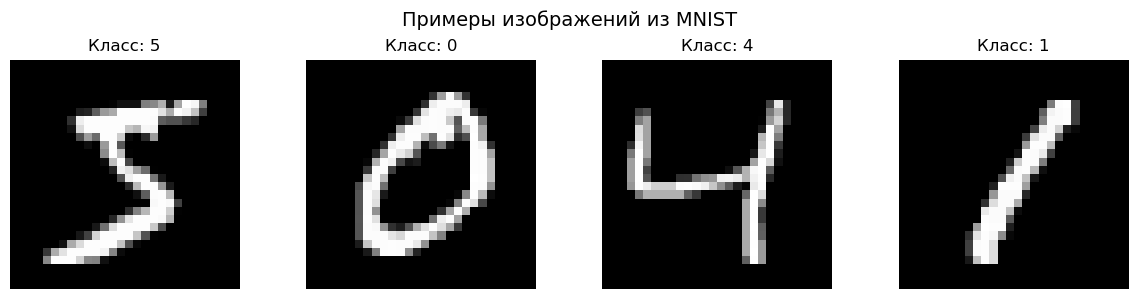

In [180]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from openTSNE import TSNE as openTSNE
import time

(X_full, y_full), (_, _) = mnist.load_data()
print(f'Размер датасета: {X_full.shape}')

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(X_full[i], cmap='gray')
    axes[i].set_title(f'Класс: {y_full[i]}')
    axes[i].axis('off')
plt.suptitle('Примеры изображений из MNIST', fontsize=14)
plt.tight_layout()
plt.show()

X_full = X_full.reshape(X_full.shape[0], -1)

N_SAMPLES = 3000
np.random.seed(42)
sample_indices = np.random.choice(X_full.shape[0], N_SAMPLES, replace=False)
X_sample = X_full[sample_indices]
y_sample = y_full[sample_indices]


In [181]:
def visualize_tsne_param(X, y, param_name, values, fixed_params=None):
    fixed_params = fixed_params or {}
    
    fig, axes = plt.subplots(1, len(values), figsize=(4*len(values), 4))
    axes = np.array(axes).reshape(-1)

    for i, val in enumerate(values):
        params = {param_name: val, **fixed_params}

        start = time.time()
        tsne = openTSNE(n_components=2, random_state=42, n_jobs=4, **params)
        Y = tsne.fit(X)
        elapsed = time.time() - start

        scatter = axes[i].scatter(Y[:, 0], Y[:, 1], c=y, cmap="tab10",
                                  s=15, alpha=0.7, edgecolors="none")

        axes[i].set_title(f"{param_name}={val}\n{elapsed:.1f} c")
        axes[i].set_xticks([])
        axes[i].set_yticks([])

        plt.colorbar(scatter, ax=axes[i], label="Класс")

    plt.suptitle(f"Влияние параметра: {param_name}", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

**Влияние perplexity**

Изменяем число эффективных соседей, влияющих на локальную структуру.

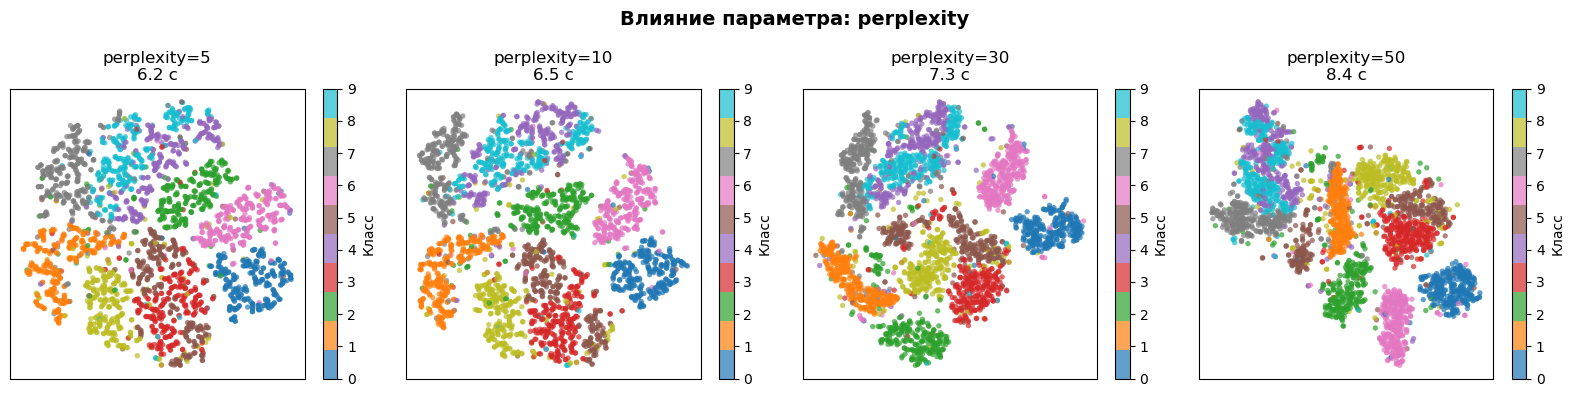

In [182]:
visualize_tsne_param(X_sample, y_sample, "perplexity", [5, 10, 30, 50])

**Влияние early_exaggeration**

Отвечает за усиление разделения кластеров на начальных итерациях.

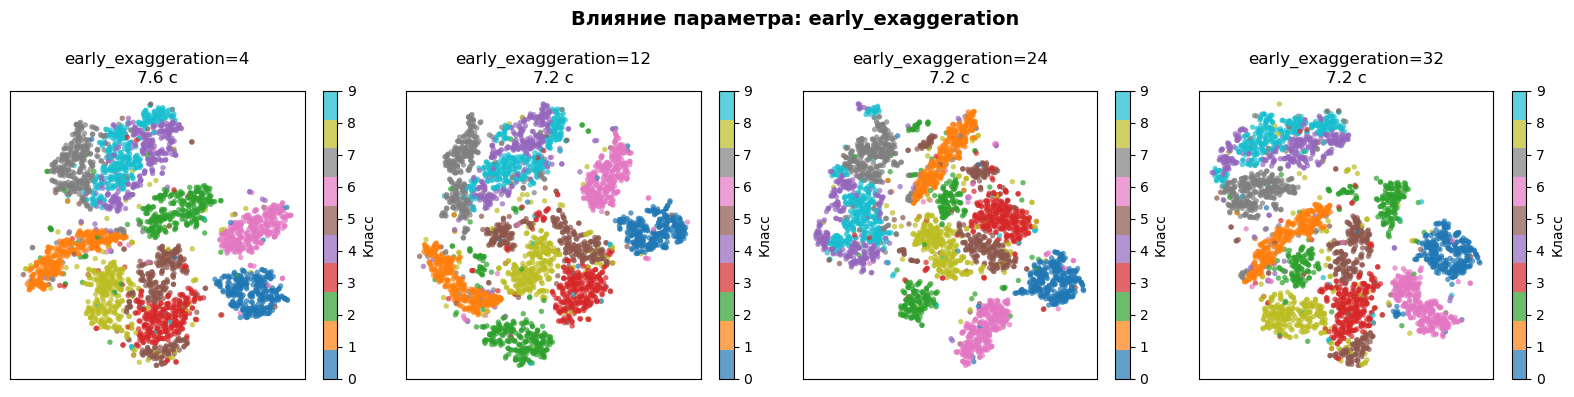

In [183]:
visualize_tsne_param(
    X_sample, y_sample,
    "early_exaggeration",
    [4, 12, 24, 32],
    fixed_params={"perplexity": 30}
)

**Влияние exaggeration**

Усиление отталкивания между кластерами.

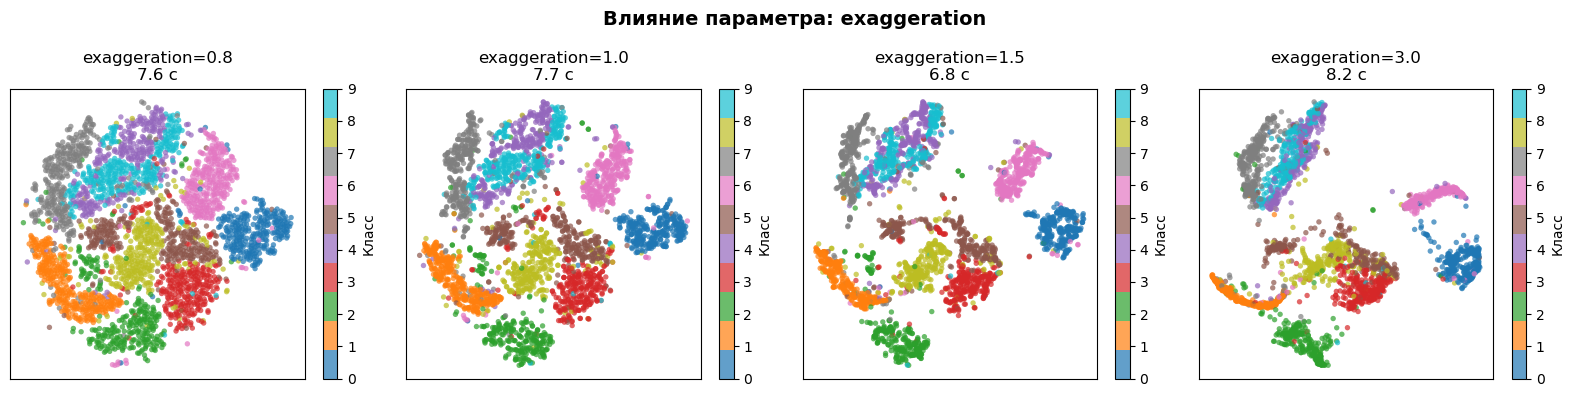

In [184]:
visualize_tsne_param(
    X_sample, y_sample,
    "exaggeration",
    [0.8, 1.0, 1.5, 3.0],
    fixed_params={"perplexity": 30}
)

**Влияние initialization**

Параметр определяет начальное расположение точек.

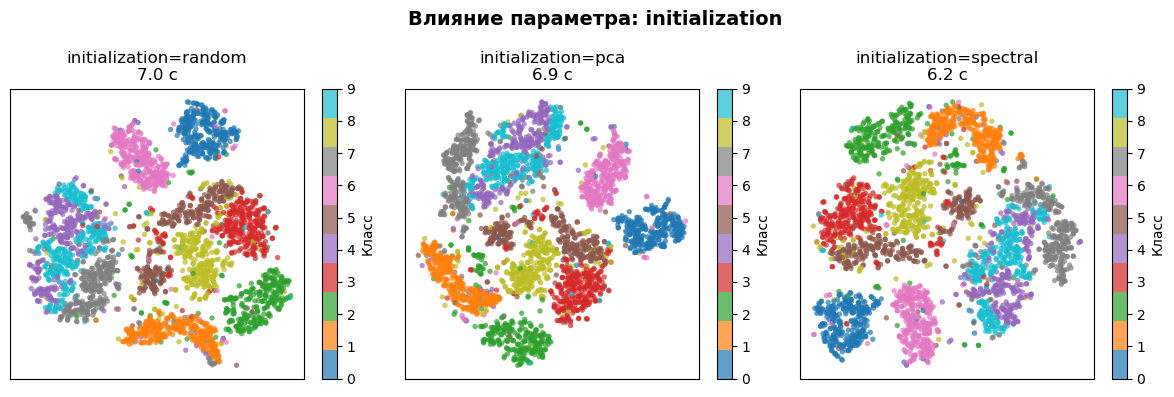

In [185]:
visualize_tsne_param(
    X_sample, y_sample,
    "initialization",
    ["random", "pca", "spectral"],
    fixed_params={"perplexity": 30}
)

**Влияние dof**

Степень свободы распределения Стьюдента, регулирует «толстость хвостов».

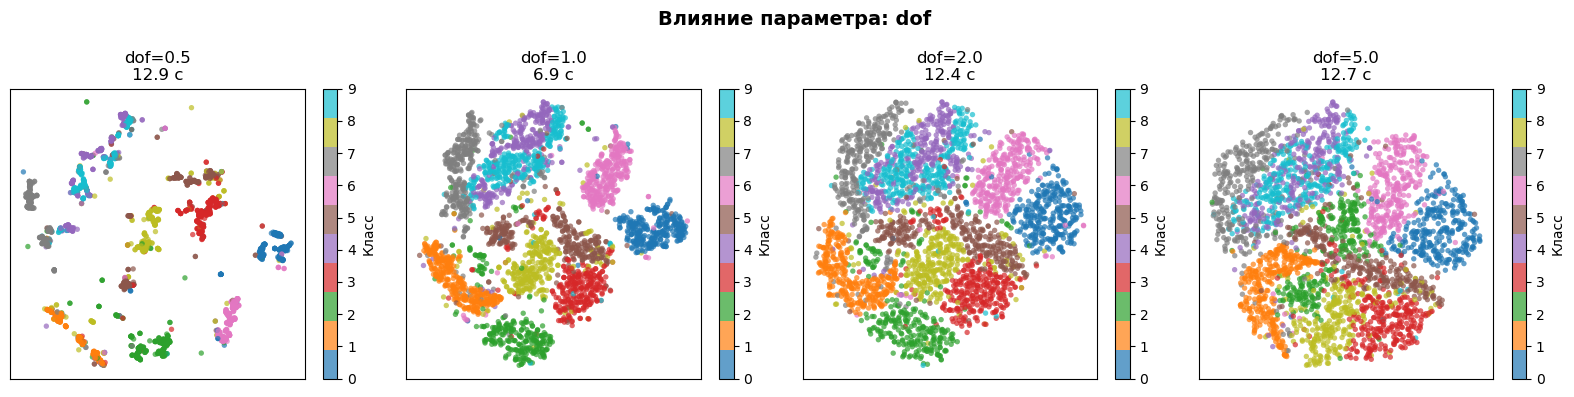

In [186]:
visualize_tsne_param(
    X_sample, y_sample,
    "dof",
    [0.5, 1.0, 2.0, 5.0],
    fixed_params={"perplexity": 30}
)